In [1]:
import numpy as np
import pandas as pd

In [2]:
Total_E= (9/14)*np.log2(14/9) + (5/14)*(np.log2(14/5))
Total_E

0.9402859586706311

In [3]:
Esunny= (2/5)*np.log2(5/2) + (3/5)*(np.log2(5/3))
Esunny

0.9709505944546687

In [4]:
Eovercast=0

In [5]:
Erainy= (3/5)*np.log2(5/3) + (2/5)*(np.log2(5/2))
Erainy

0.9709505944546687

In [6]:
IGoutlook= Total_E-((Esunny*(5/14))+(Eovercast*(4/14))+(Erainy*(5/14)))
IGoutlook

0.24674981977443922

In [7]:
Total_GI= 1-(((9/14)**2)+((5/14)**2))
Total_GI

0.4591836734693877

In [33]:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier,plot_tree
from sklearn.metrics import accuracy_score,classification_report
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt

In [34]:
df= pd.read_csv('horse.csv')

In [35]:
df.shape

(299, 28)

In [36]:
df.head()

,surgery,age,hospital_number,rectal_temp,pulse,respiratory_rate,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,...,packed_cell_volume,total_protein,abdomo_appearance,abdomo_protein,outcome,surgical_lesion,lesion_1,lesion_2,lesion_3,cp_data
0,no,adult,530101,38.5,66.0,28.0,cool,reduced,NaN,more_3_sec,...,45.0,8.4,NaN,NaN,died,no,11300,0,0,no
1,yes,adult,534817,39.2,88.0,20.0,NaN,NaN,pale_cyanotic,less_3_sec,...,50.0,85.0,cloudy,2.0,euthanized,no,2208,0,0,no
2,no,adult,530334,38.3,40.0,24.0,normal,normal,pale_pink,less_3_sec,...,33.0,6.7,NaN,NaN,lived,no,0,0,0,yes
3,yes,young,5290409,39.1,164.0,84.0,cold,normal,dark_cyanotic,more_3_sec,...,48.0,7.2,serosanguious,5.3,died,yes,2208,0,0,yes
4,no,adult,530255,37.3,104.0,35.0,NaN,NaN,dark_cyanotic,more_3_sec,...,74.0,7.4,NaN,NaN,died,no,4300,0,0,no


In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 299 entries, 0 to 298
Data columns (total 28 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   surgery                299 non-null    object 
 1   age                    299 non-null    object 
 2   hospital_number        299 non-null    int64  
 3   rectal_temp            239 non-null    float64
 4   pulse                  275 non-null    float64
 5   respiratory_rate       241 non-null    float64
 6   temp_of_extremities    243 non-null    object 
 7   peripheral_pulse       230 non-null    object 
 8   mucous_membrane        252 non-null    object 
 9   capillary_refill_time  267 non-null    object 
 10  pain                   244 non-null    object 
 11  peristalsis            255 non-null    object 
 12  abdominal_distention   243 non-null    object 
 13  nasogastric_tube       195 non-null    object 
 14  nasogastric_reflux     193 non-null    object 
 15  nasoga

In [38]:
df.isnull().sum()

surgery                    0
age                        0
hospital_number            0
rectal_temp               60
pulse                     24
respiratory_rate          58
temp_of_extremities       56
peripheral_pulse          69
mucous_membrane           47
capillary_refill_time     32
pain                      55
peristalsis               44
abdominal_distention      56
nasogastric_tube         104
nasogastric_reflux       106
nasogastric_reflux_ph    246
rectal_exam_feces        102
abdomen                  118
packed_cell_volume        29
total_protein             33
abdomo_appearance        165
abdomo_protein           198
outcome                    0
surgical_lesion            0
lesion_1                   0
lesion_2                   0
lesion_3                   0
cp_data                    0
dtype: int64

In [39]:
target=df[['outcome']]
features= df.drop(columns='outcome')

In [40]:
features.shape

(299, 27)

In [41]:
num_col= [i for i in features.columns if features.dtypes[i]!='O']
print(num_col)

['hospital_number', 'rectal_temp', 'pulse', 'respiratory_rate', 'nasogastric_reflux_ph', 'packed_cell_volume', 'total_protein', 'abdomo_protein', 'lesion_1', 'lesion_2', 'lesion_3']


In [42]:
cat_col= [i for i in features.columns if features.dtypes[i]=='O']
print(cat_col)

['surgery', 'age', 'temp_of_extremities', 'peripheral_pulse', 'mucous_membrane', 'capillary_refill_time', 'pain', 'peristalsis', 'abdominal_distention', 'nasogastric_tube', 'nasogastric_reflux', 'rectal_exam_feces', 'abdomen', 'abdomo_appearance', 'surgical_lesion', 'cp_data']


In [43]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import OrdinalEncoder,StandardScaler

In [44]:
simple_1=SimpleImputer(missing_values=np.nan,strategy='most_frequent')

In [76]:
df1=pd.DataFrame(simple_1.fit_transform(features[cat_col]),columns=cat_col)
df1.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,no,adult,cool,reduced,normal_pink,more_3_sec,extreme_pain,absent,severe,slight,none,decreased,distend_large,cloudy,no,no
1,yes,adult,cool,normal,pale_cyanotic,less_3_sec,mild_pain,absent,slight,slight,none,absent,other,cloudy,no,no
2,no,adult,normal,normal,pale_pink,less_3_sec,mild_pain,hypomotile,none,slight,none,normal,normal,cloudy,no,yes
3,yes,young,cold,normal,dark_cyanotic,more_3_sec,depressed,absent,severe,none,less_1_liter,decreased,distend_large,serosanguious,yes,yes
4,no,adult,cool,normal,dark_cyanotic,more_3_sec,mild_pain,hypomotile,none,slight,none,absent,distend_large,cloudy,no,no


In [77]:
ord_enc=OrdinalEncoder()
df1=pd.DataFrame(ord_enc.fit_transform(df1),columns=cat_col)
df1.head()

,surgery,age,temp_of_extremities,peripheral_pulse,mucous_membrane,capillary_refill_time,pain,peristalsis,abdominal_distention,nasogastric_tube,nasogastric_reflux,rectal_exam_feces,abdomen,abdomo_appearance,surgical_lesion,cp_data
0,0.0,0.0,1.0,3.0,3.0,2.0,2.0,0.0,2.0,2.0,2.0,1.0,0.0,1.0,0.0,0.0
1,1.0,0.0,1.0,2.0,4.0,1.0,3.0,0.0,3.0,2.0,2.0,0.0,4.0,1.0,0.0,0.0
2,0.0,0.0,2.0,2.0,5.0,1.0,3.0,2.0,1.0,2.0,2.0,3.0,3.0,1.0,0.0,1.0
3,1.0,1.0,0.0,2.0,2.0,2.0,1.0,0.0,2.0,0.0,0.0,1.0,0.0,2.0,1.0,1.0
4,0.0,0.0,1.0,2.0,2.0,2.0,3.0,2.0,1.0,2.0,2.0,0.0,0.0,1.0,0.0,0.0


In [78]:
simple_2= SimpleImputer(missing_values=np.nan,strategy='median')

In [79]:
df2=pd.DataFrame(simple_2.fit_transform(features[num_col]),columns=num_col)
df2.isnull().sum()

hospital_number          0
rectal_temp              0
pulse                    0
respiratory_rate         0
nasogastric_reflux_ph    0
packed_cell_volume       0
total_protein            0
abdomo_protein           0
lesion_1                 0
lesion_2                 0
lesion_3                 0
dtype: int64

In [80]:
std_sca=StandardScaler()
df2=pd.DataFrame(std_sca.fit_transform(df2),columns=df2.columns)
df2.head()

,hospital_number,rectal_temp,pulse,respiratory_rate,nasogastric_reflux_ph,packed_cell_volume,total_protein,abdomo_protein,lesion_1,lesion_2,lesion_3
0,-0.364592,0.496498,-0.194771,-0.087726,0.062143,-0.119170,-0.533355,-0.209831,1.415021,-0.139371,-0.057928
1,-0.361509,1.565603,0.604982,-0.588538,0.062143,0.385530,2.380057,-0.461797,-0.268864,-0.139371,-0.057928
2,-0.364440,0.191039,-1.139933,-0.338132,0.062143,-1.330449,-0.598013,-0.209831,-0.677797,-0.139371,-0.057928
3,2.747804,1.412873,3.367763,3.417962,0.062143,0.183650,-0.578996,2.309828,-0.268864,-0.139371,-0.057928
4,-0.364491,-1.336253,1.186620,0.350485,0.062143,2.808088,-0.571389,-0.209831,0.118585,-0.139371,-0.057928


In [84]:
df1.shape

(299, 16)

In [85]:
df2.shape

(299, 11)

In [87]:
features_new=pd.concat([df1,df2],axis=1)

In [88]:
x_train,x_test,y_train,y_test=train_test_split(features_new,target,train_size=0.75,random_state=100)

In [93]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(224, 27)
(75, 27)
(224, 1)
(75, 1)


In [126]:
dec_tree=DecisionTreeClassifier(criterion='gini',splitter='best',max_depth=4)

In [127]:
dec_tree.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=4)

In [128]:
y_pred= dec_tree.predict(x_test)

In [129]:
accuracy_score(y_test,y_pred)

0.6666666666666666

In [122]:
params={'criterion':['gini','entropy'],'splitter':['best','random'],'max_depth':range(1,7)}

In [123]:
grid_search=GridSearchCV(dec_tree,params)

In [124]:
grid_search.fit(x_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(criterion='entropy', max_depth=6,
                                              splitter='random'),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 7),
                         'splitter': ['best', 'random']})

In [125]:
grid_search.best_params_

{'criterion': 'gini', 'max_depth': 4, 'splitter': 'best'}

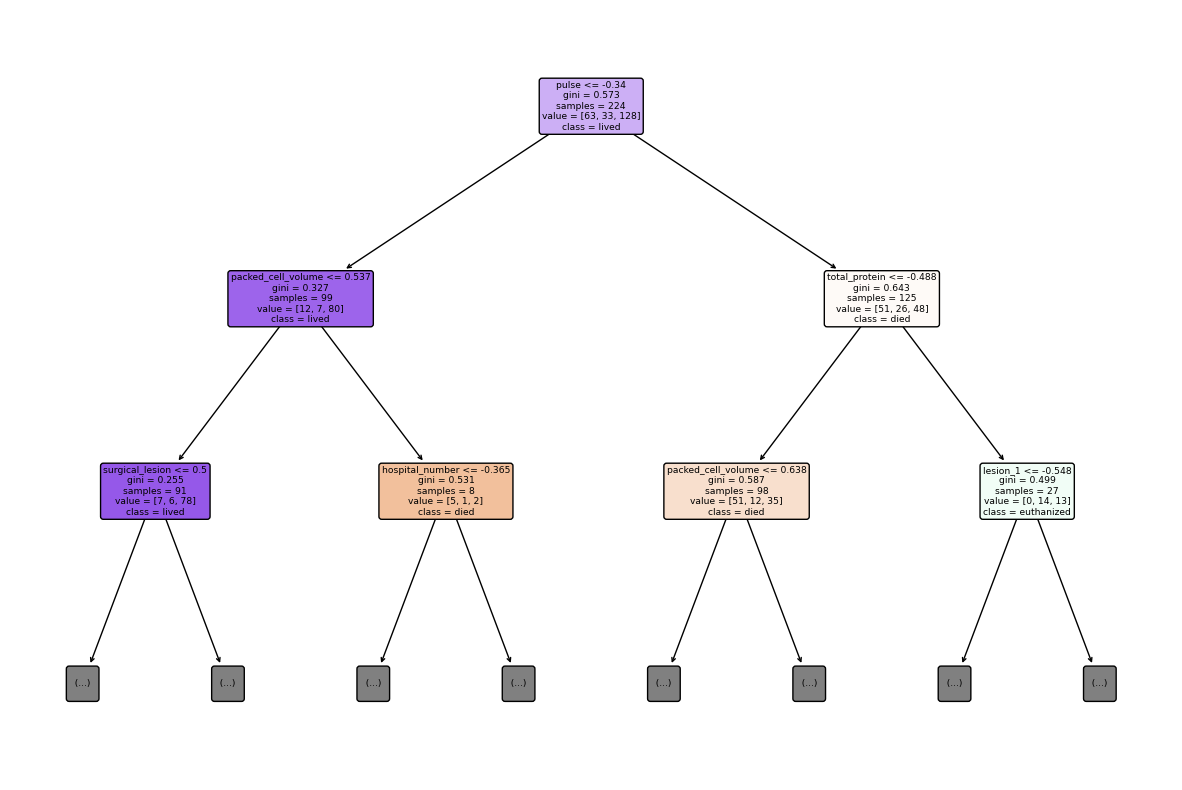

In [140]:
plt.figure(figsize=(15,10))
plot_tree(dec_tree,filled=True,rounded=True,feature_names=list(features_new),class_names=list(target.outcome.unique()),
          max_depth=2);

### RFE

In [143]:
features_new.shape

(299, 27)

In [142]:
from sklearn.feature_selection import RFE

In [145]:
rfe1=RFE(dec_tree,n_features_to_select=5)

In [147]:
rfe1.fit(x_train,y_train)

RFE(estimator=DecisionTreeClassifier(max_depth=4), n_features_to_select=5)

In [148]:
rfe1.ranking_

array([23, 22, 21, 20, 19, 18, 17, 16, 15, 14, 13, 12, 10, 11,  3,  9,  1,
        7,  1,  8,  4,  1,  1,  2,  1,  6,  5])

In [149]:
rfe1.get_support()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False,  True, False,
        True, False, False,  True,  True, False,  True, False, False])

In [154]:
features_new.columns[rfe1.get_support()]

Index(['hospital_number', 'pulse', 'packed_cell_volume', 'total_protein',
       'lesion_1'],
      dtype='object')

## Naive_Bayes

In [156]:

Pn= (2/5)*(4/5)*(2/5)*(5/14)
Pn

0.04571428571428573

In [157]:
Py=(3/9)*(3/9)*(6/9)*(9/14)
Py

0.04761904761904762

In [158]:
Pyes= Py/(Py+Pn)
Pyes

0.510204081632653

In [159]:
Pno= Pn/(Py+Pn)
Pno

0.489795918367347

In [160]:
from sklearn.naive_bayes import MultinomialNB,BernoulliNB,GaussianNB

In [163]:
## BernoulliNB
Bern=BernoulliNB()
Bern.fit(x_train,y_train)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


BernoulliNB()

In [164]:
y_pred= Bern.predict(x_test)
accuracy_score(y_test,y_pred)

0.6133333333333333

In [165]:
## GaussianNB
gaus= GaussianNB()
gaus.fit(x_train,y_train)
y_pred= gaus.predict(x_test)
accuracy_score(y_test,y_pred)

C:\Users\excel\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


0.25333333333333335